In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
def distrib(ray, nray = 10,nsec = 6, gauss=True, gam0 = 1.0, eps= 0):
    
    """
        Particles distributed evenly spaced into a disc.
         rf,zf : particles positions
         ds    : particle surface size 
         cir   : particle circulation
         dr    : size step along radial axis
         nray  : nb of points along adial axis
         dray  : particle ray in the center
         ray   : disc ray
         gam0  : total strength of the vortex 
         surf  : disc surface
         nsec  : number of particles around the center particle
         eps   : ellipsis parameter
         
    """

    pi = np.pi
    
    dr = ray / (nray + 0.5)
    dray = 0.5 * dr  
    surf = pi * ray * ray
    dtheta = 2.0 * pi / nsec

    k = 0
    rf = [0.0]
    zf = [0.0]
    ds = [pi * dray * dray]

    if gauss:
        gamt = gam0 / (1. - np.exp(-1.0))
        cf = [gamt * (1. - np.exp(-(dray / ray) ** 2))]  # gaussian
    else:
        cf = [gam0 * ds[k] / surf]  # uniform

    r1 = dray
    s1 = pi * r1 ** 2
    nsec0 = nsec
    nsec = 0

    for i in range(nray):

        nsec = nsec + nsec0
        dtheta = 2.0 * pi / nsec
        r = (i + 1) * dr

        r2  = r + 0.5 * dr
        s2  = pi * r2 ** 2
        dss = s2 - s1
        s1  = s2

        for j in range(nsec):

            k = k + 1
            theta = (j + 1) * dtheta
            sigma = r * (1.0 + eps * np.cos(2.0 * theta))
            rf.append(sigma * np.cos(theta))
            zf.append(sigma * np.sin(theta))
            ds.append(dss / nsec)
            if gauss:  # gaussian
                q = 0.5 * (np.exp(-(r1 / ray) ** 2) - np.exp(-(r2 / ray) ** 2))
                strength = gamt * dtheta / pi * q
            else:      # uniform
                strength = gam0 * ds[k] / surf
            
            cf.append(strength)
                
        r1 = r2
        kd = k - nsec + 1

    nr = k
    print (len(rf),len(zf),len(cf))

    ssurf = np.sum(ds)
    sgam  = np.sum(cf)

    print('toal number of particles :', nr)
    print('check surface :', (surf), ' - ', (ssurf))
    if (gauss):
        print('check vortex strength :', (gam0), ' ; ', (sgam))
    else:
        print('check vortex strength :', (gam0), ' ; ', (sgam))
        
    

    return np.array(rf), np.array(zf), np.array(ds), np.array(cf)


331 331 331
toal number of particles : 330
check surface : 3.141592653589793  -  3.14159265359
check vortex strength : 1.0  ;  1.0


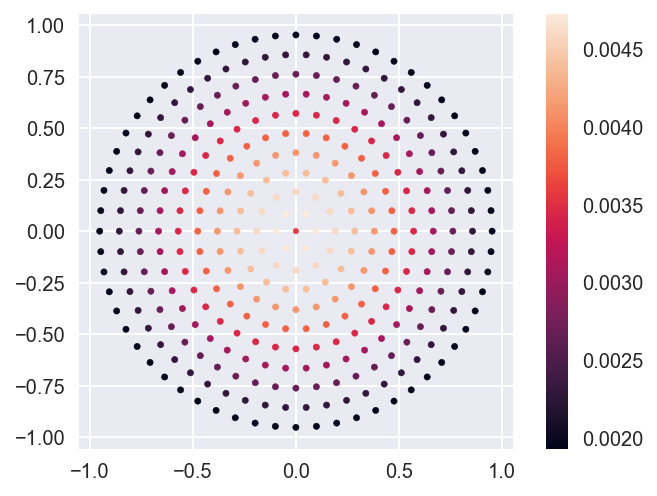

In [3]:
import seaborn as sns
sns.set()
r, z, s, g = distrib(1.0)
plt.scatter(r, z, 1e3*s, g)
plt.axis('scaled')
plt.grid(True)
plt.colorbar();

In [5]:


amach = 0.1
nproc = 1

pi = np.pi
r0 = 0.6
u0 = amach

#gam0   = u0 * 2.0 * pi / 0.7 * r0	!gaussienne
#gam0   = 2. * pi * r0 * u0		!constant
gam0   = 2. * pi / 10.0

aom    = gam0 / ( pi * r0**2 )	#Amplitude du vortex
tau    = 8.0 * pi**2 / gam0	#Periode de co-rotation
gomeg  = gam0/ (4.0*pi)		#Vitesse angulaire

print( " --------------------------------------------- ")
print( " steps : ", nstep)
print( " time step : ", dt)
print( " animation : ", imov, " steps ")
print( " aom = ", aom)
print( " r0 = ", r0)
print( " strength = ", gam0)
print( " rotation speed gomeg = ", gomeg)
print( " corotation period = ", tau)
print( " --------------------------------------------- ")

rf, zf , ds, gam =  distrib( r0 )

xp = np.concatenate([rf, rf])
yp = np.concatenate([zf + 1., zf - 1])
op = np.concatenate([gam,gam])

 --------------------------------------------- 
 steps :  1
 time step :  0.01
 animation :  1  steps 
 aom =  0.5555555555555556
 r0 =  0.6
 strength =  0.6283185307179586
 rotation speed gomeg =  0.05
 corotation period =  125.66370614359172
 --------------------------------------------- 
331 331 331
toal number of particles : 330
check surface : 1.1309733552923256  -  1.13097335529
check vortex strength : 1.0  ;  1.0


In [33]:
def velocities (xp, yp, op, delta = 1e-2):

    dpi   = 2 * np.pi

    up = 0.
    vp = 0.
    n = xp.size
    
    dx = xp[:,np.newaxis] - xp[np.newaxis,:]
    dy = yp[:,np.newaxis] - yp[np.newaxis,:]
    rsq = dx*dx + dy*dy
    rsq += rsq == 0
     
    up = np.sum(dy / rsq, axis=0) * op / dpi
    vp = -np.sum(dx / rsq, axis=1) * op / dpi 
    return up, vp
   


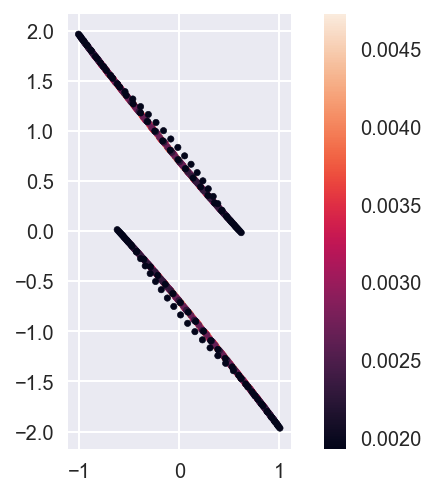

In [34]:
n = xp.size
plt.scatter(xp, yp, 10*np.ones(n),  op)
plt.axis('scaled')
plt.grid(True)
plt.colorbar();

In [35]:
import time
steps   = 100
delta_t = 0.01

start = time.clock()
up, vp = velocities(xp, yp, op)
for k in range(steps):
    xp_h = xp + 0.5 * delta_t * up
    yp_h = yp + 0.5 * delta_t * vp
    up, vp = velocities(xp_h, yp_h, op)
    xp += delta_t * up
    yp += delta_t * vp
    print(k, end=',')
    
end = time.clock()

print ("CPU time: {0} s".format(end-start))


0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,CPU time: 0.6097579999999994 s


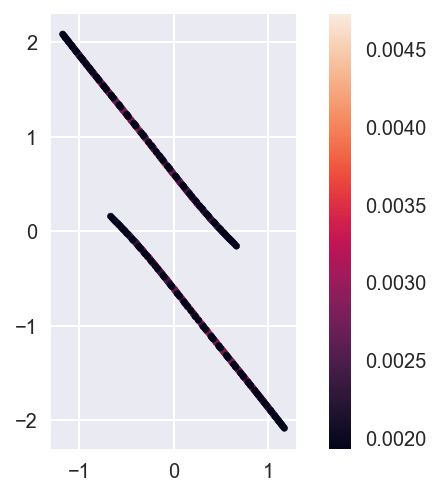

In [36]:
n = xp.size
plt.scatter(xp, yp, 10*np.ones(n),  op)
plt.axis('scaled')
plt.grid(True)
plt.colorbar();